Hola Jesus!

Mi nombre es Matias y voy a estar revisando tu proyecto.

En la primer revision, de encontrar errores voy a estar marcandotelos para que puedas corregirlos por tu cuenta. Lo mas parecido a una situacion real de trabajo como DA. De haber posteriores revisiones te ire brindando mayor soporte para reforzar conceptos y sacar el proyecto adelante

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

**Propósito del proyecto**

El objetivo principal de este proyecto es determinar cuál de las dos tarifas de prepago ofrecidas por el operador de telecomunicaciones Megaline, Surf o Ultimate, genera más ingresos. 

Esta información permitirá al departamento comercial ajustar adecuadamente el presupuesto de publicidad.

**Acciones a planeadas a realizar**

1. Abrir y estudiar la información general contenida en los archivos de datos proporcionados.


2. Preparar los datos para el análisis, que incluye:
- Convertir los datos en los tipos adecuados.
- Identificar y eliminar errores o inconsistencias en los datos.
- Calcular, para cada usuario, métricas mensuales tales como número de llamadas realizadas, minutos utilizados, cantidad de SMS enviados, volumen de datos utilizados e ingresos generados.


3. Analizar el comportamiento de los clientes, describir y visualizar las distribuciones de minutos, SMS y volumen de datos que utilizan los usuarios de cada tarifa por mes. Se calcularán estadísticas descriptivas como la media, la varianza y la desviación estándar.


4. Probar las hipótesis de que:
- El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
- El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.


5. Concluir con un resumen general sobre qué tarifa genera más ingresos y proporcionar recomendaciones basadas en los resultados del análisis.

## Inicialización

Importamos las librerías necesarias:

In [1]:
# Cargar todas las librerías

# Pandas para manipulación de datos
import pandas as pd

# Numpy para operaciones numéricas
import numpy as np

# Matplotlib y Seaborn para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# SciPy para pruebas estadísticas
from scipy import stats

## Cargar los datos

Cargemos los archivos CSV en diferentes DataFrames. Basándonos en las rutas de archivo proporcionadas:

In [2]:
# Cargamos cada conjunto de datos en su respectivo DataFrame
megaline_calls = pd.read_csv('/datasets/megaline_calls.csv')
megaline_internet = pd.read_csv('/datasets/megaline_internet.csv')
megaline_messages = pd.read_csv('/datasets/megaline_messages.csv')
megaline_plans = pd.read_csv('/datasets/megaline_plans.csv')
megaline_users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

Para comprender mejor nuestros datos, es esencial realizar una exploración inicial de cada uno de los conjuntos de datos. Esta exploración nos ayudará a identificar cualquier anomalía, valor faltante, o error que pueda estar presente. Luego, basándonos en nuestras observaciones, realizaremos las correcciones necesarias para asegurarnos de que nuestros datos estén listos para el análisis.

**Exploración Inicial de los Datos**

Para cada conjunto de datos, necesitamos echar un vistazo a las primeras entradas y obtener información general, como el número de filas y columnas, tipos de datos y estadísticas básicas.

### Conjunto de datos de llamadas (megaline_calls)

In [3]:
print(megaline_calls.head())
print(megaline_calls.info())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


##### Análisis Inicial de los Datos de Llamadas

Observaciones:

El conjunto de datos de llamadas, megaline_calls, contiene 137,735 registros.

Hay 4 columnas presentes: id, user_id, call_date, y duration.

Todas las columnas tienen valores no nulos.

Las columnas id y call_date tienen el tipo de dato 'object', mientras que user_id es 'int64' y duration es 'float64'.

Anomalías o Problemas Potenciales:

1. La columna call_date tiene el tipo de dato 'object', lo que indica que probablemente esté en formato de texto en lugar de una fecha. Para un análisis temporal, es más conveniente que esta columna esté en formato de fecha.
2. La columna id se presenta como un objeto, lo que sugiere que es una combinación de user_id y otro identificador. Aunque este no es necesariamente un problema, podría ser útil entender la estructura de este identificador y determinar si es necesario.
3. Podría haber llamadas con duración de 0.0, lo que podría indicar llamadas no atendidas o fallidas. Necesitaremos investigar esto más a fondo, ya que podría afectar análisis relacionados con la duración de las llamadas.

##### Corrección y Enriquecimiento de los Datos de Llamadas

**Convertir call_date a tipo de dato fecha**

Antes de convertir la columna call_date, primero verifiquemos que todos sus valores sean convertibles a fechas. Si encontramos algún valor que no sea una fecha válida, tendremos que abordarlo antes de la conversión.

In [4]:
# Intentar convertir call_date a fecha para ver si hay errores
try:
    megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'])
    print("Conversión exitosa.")
except Exception as e:
    print(f"Error en la conversión: {e}")

Conversión exitosa.


La conversión fue exitosa, la columna call_date ahora estará en el formato correcto para análisis temporales.

**Investigar la estructura y necesidad del identificador en la columna id**

El id parece ser una combinación del user_id y otro identificador. Veamos cuántos identificadores únicos existen para cada user_id y si estos son consecutivos:

In [5]:
id_counts = megaline_calls.groupby('user_id')['id'].nunique()
print(id_counts.describe())

count     481.000000
mean      286.351351
std       238.182107
min         2.000000
25%       108.000000
50%       216.000000
75%       413.000000
max      1300.000000
Name: id, dtype: float64


Basado en estos resultados, podemos deducir que:

Distribución de llamadas por usuario: Hay una variabilidad considerable en el número de llamadas realizadas por los usuarios. Mientras que algunos usuarios han hecho solo unas pocas llamadas, otros han realizado muchas.

Decisión sobre la columna id: 
La columna id no es simplemente una numeración consecutiva de llamadas para cada usuario. Dado que el mínimo es 2 y no 1, hay posibilidad de que los números no comiencen desde 1 para todos los usuarios o que falten registros. Además, dado que el máximo es 1300 y la media es 286, algunos usuarios hacen muchas más llamadas que otros.

Por lo tanto, puede ser beneficioso mantener la columna id tal como está, ya que proporciona información única sobre cada llamada para un usuario específico.

Continuaremos con el análisis de otros aspectos del conjunto de datos, como las fechas y duraciones de las llamadas.

### Conjunto de datos de mensajes (megaline_messages)

Vamos a comenzar echando un vistazo a las primeras entradas y obteniendo información general del conjunto de datos de mensajes.

In [6]:
print(megaline_messages.head())
print(megaline_messages.info())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


**Observaciones:**

La tabla tiene un total de 76,051 entradas.
Las columnas son 'id', 'user_id' y 'message_date'.
No hay valores nulos en ninguna columna, lo que indica una buena integridad en este conjunto de datos.
La columna 'message_date' está en formato string (object). Para facilitar análisis temporales, podría ser útil convertirla al tipo de dato datetime.

In [7]:
# Convertir la columna 'message_date' a datetime
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])

# Verificar la conversión
print(megaline_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


Perfecto, la columna message_date se ha convertido correctamente al tipo de dato datetime64. 

Ahora se puede realizar diversas operaciones relacionadas con fechas, como agrupaciones por mes, día, semana, etc., de una manera mucho más eficiente y sencilla.

### Conjunto de datos de uso de internet (megaline_internet)

Visualización Inicial:

In [8]:
print(megaline_internet.head())
print(megaline_internet.info())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None


Para asegurarnos de que los datos se manejen correctamente y para realizar análisis temporales, debemos convertir la columna 'session_date' a tipo 'datetime'.

In [9]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])
print(megaline_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


Análisis de la columna 'mb_used':
Primero, es relevante revisar las sesiones donde no se usaron datos para comprender mejor el comportamiento de los usuarios o identificar posibles errores.

In [10]:
sessions_with_zero_data = megaline_internet[megaline_internet['mb_used'] == 0].shape[0]
print(f"Número de sesiones con 0 MB de datos utilizados: {sessions_with_zero_data}")

Número de sesiones con 0 MB de datos utilizados: 13747


El hecho de que haya 13,747 sesiones con 0 MB de datos utilizados es interesante y potencialmente importante. Esto podría ser indicativo de varias situaciones:

Conexiones Fallidas: Los usuarios intentaron conectarse a Internet, pero hubo un problema, y no pudieron usar ningún dato.

Errores de Registro: Podría haber algún problema con el sistema de registro que no registró correctamente el uso de datos.

Uso Mínimo: Es posible que los usuarios hayan realizado sesiones muy cortas donde el uso de datos fue insignificante y se redondeó a 0 MB.

Para comprender la magnitud del problema, sería útil calcular la proporción de estas sesiones respecto al total.

In [11]:
proportion_zero_data = (sessions_with_zero_data / len(megaline_internet)) * 100
print(f"Porcentaje de sesiones con 0 MB de datos utilizados: {proportion_zero_data:.2f}%")

Porcentaje de sesiones con 0 MB de datos utilizados: 13.11%


Un 13.11% de las sesiones con 0 MB de datos utilizados es una proporción no significativa. Aunque esto implica que más de 1 de cada 10 sesiones de uso de datos no registró ningún consumo de datos.

Pero conservarlos y marcarlos nos permitirá revisarlos más tarde si es necesario.

### Conjunto de datos de planes (megaline_plans)

In [12]:
print(megaline_plans.head())
print(megaline_plans.info())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   pla

El conjunto de datos megaline_plans describe dos planes diferentes de telefonía móvil: "surf" y "ultimate". Cada fila representa un plan y muestra:

La cantidad de mensajes incluidos.
La cantidad de megabytes incluidos por mes.
La cantidad de minutos incluidos.
El pago mensual en USD.
El costo por gigabyte (después de superar el límite incluido) en USD.
El costo por mensaje (después de superar el límite incluido) en USD.
El costo por minuto (después de superar el límite incluido) en USD.
El nombre del plan.

**Observaciones:**

No hay valores nulos en ninguna de las columnas.
Los tipos de datos parecen apropiados para cada columna.
Dado que sólo hay dos entradas (dos planes), la exploración es bastante sencilla y no se espera que haya mucha variabilidad o problemas en los datos.
Próximos pasos:
Para este conjunto de datos en particular, parece que no es necesario realizar más transformaciones o limpiezas. La información es clara y será útil para calcular los gastos de cada usuario en función del plan que hayan elegido y su consumo.

### Conjunto de datos de usuarios (megaline_users)

In [13]:
print(megaline_users.head())
print(megaline_users.info())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    

El conjunto de datos megaline_users describe la información de los usuarios de la compañía Megaline. 

Cada fila representa un usuario individual y muestra:

user_id: el identificador único del usuario.

first_name: el nombre del usuario.

last_name: el apellido del usuario.

age: la edad del usuario.

city: la ciudad donde reside el usuario.

reg_date: la fecha en la que el usuario se registró con Megaline.

plan: el plan telefónico que el usuario ha seleccionado (surf o ultimate).

churn_date: la fecha en que el usuario dejó de usar el servicio de Megaline (si es aplicable).



**Observaciones:**

No hay valores nulos en la mayoría de las columnas, excepto en churn_date, donde la mayoría de los valores son nulos. 
Esto es esperado, ya que churn_date sólo se llenaría si un usuario dejara de usar el servicio.

Los tipos de datos para la mayoría de las columnas parecen apropiados. 
Sin embargo, reg_date y churn_date deben ser convertidos a formato de fecha (datetime).

Hay 500 usuarios en total en el dataset.
El campo churn_date tiene 34 entradas no nulas, lo que indica que 34 usuarios han dejado el servicio.

**Próximos pasos:**
Convertir las columnas reg_date y churn_date al tipo de datos datetime.

Para convertir las columnas reg_date y churn_date al tipo de datos datetime en el DataFrame megaline_users, podemos usar la función to_datetime() de pandas.

In [14]:
# Convertir la columna reg_date a datetime
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'])

# Convertir la columna churn_date a datetime
megaline_users['churn_date'] = pd.to_datetime(megaline_users['churn_date'])

# Verificar los cambios en los tipos de datos
print(megaline_users.dtypes)

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object


Perfecto, la conversión ha sido exitosa. Las columnas reg_date y churn_date ahora son del tipo datetime64, lo cual es adecuado para realizar análisis temporales.

## Planes

In [15]:
# Imprime la información general/resumen sobre el DataFrame de los planes
print(megaline_plans.info())
print(megaline_plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10      

In [16]:
# Imprime una muestra de los datos para los planes
print(megaline_plans.sample(n=2))

   messages_included  mb_per_month_included  minutes_included  \
1               1000                  30720              3000   
0                 50                  15360               500   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
1               70           7             0.01            0.01  ultimate  
0               20          10             0.03            0.03      surf  


**Descripción de los datos:**

El conjunto de datos megaline_plans describe dos tipos de planes telefónicos: "surf" y "ultimate". Para cada plan, se nos proporciona la siguiente información:

messages_included: Número de mensajes incluidos en el plan mensual.

mb_per_month_included: Megabytes incluidos en el plan mensual.

minutes_included: Minutos incluidos en el plan mensual.

usd_monthly_pay: Pago mensual en dólares del plan.

usd_per_gb: Precio en dólares por gigabyte (GB) adicional (una vez superado el límite del plan).

usd_per_message: Precio en dólares por mensaje adicional (una vez superado el límite del plan).

usd_per_minute: Precio en dólares por minuto adicional (una vez superado el límite del plan).

plan_name: Nombre del plan, que puede ser "surf" o "ultimate".

**Observaciones:**

El plan "surf" incluye 50 mensajes, 15,360 MB (aproximadamente 15 GB), y 500 minutos por un precio mensual de 20 dólares. Los costos adicionales son: 10 dólares por GB adicional, 0.03 dólares por mensaje y minuto adicional.

El plan "ultimate" incluye 1000 mensajes, 30,720 MB (aproximadamente 30 GB), y 3000 minutos por un precio mensual de 70 dólares. Los costos adicionales son: 7 dólares por GB adicional y 0.01 dólares por mensaje y minuto adicional.

Análisis de posibles problemas:

Tipos de datos no adecuados: No parece haber ningún tipo de dato inadecuado en el DataFrame. Todas las columnas tienen tipos de datos que coinciden con lo que se espera de su contenido.

Datos ausentes: No hay datos ausentes en este conjunto de datos. Todas las columnas tienen 2 entradas non-null.

Otros problemas: No hay datos repetidos, erróneos o anomalías visibles.

Conclusión:

El conjunto de datos megaline_plans parece estar limpio y listo para el análisis. No hay acciones correctivas inmediatas necesarias para este conjunto de datos en particular. Es simple y fácil de comprender, y no muestra problemas evidentes en cuanto a su estructura o contenido.

### Corregir los datos

Basado en el conjunto de datos presentado:

Los tipos de datos parecen apropiados para todas las columnas. 
Los conteos, límites y precios están en formatos numéricos (entero o flotante) mientras que el nombre del plan está en formato de texto (object).

No hay datos ausentes en ninguna de las columnas, todas tienen 2 entradas no nulas.

Por lo tanto, no hay correcciones necesarias basadas en la observación inicial. El conjunto de datos parece estar limpio y listo para el análisis.

Es importante recordar que siempre es útil hacer una revisión adicional a medida que se avanza en el análisis para garantizar que los datos sean consistentes y estén alineados con las expectativas y necesidades del análisis.

### Enriquecer los datos

Consideramos que la "Tarifa fuera de los límites" sería una adición valiosa al análisis. 

La razón es simple: permite a los analistas y a la empresa obtener una vista rápida de cuánto se cobraría a un cliente si excediera los límites de su plan. 

Esto es útil tanto para la planificación financiera como para evaluar el atractivo de un plan para un cliente potencial.

Perspectivas: 

**Perspectiva del Cliente:** Si un cliente potencial está comparando planes, le gustaría saber no sólo cuánto pagará cada mes, sino también cuánto podría terminar pagando si excede los límites del plan.

**Perspectiva Empresarial:** Esto permite a la empresa anticipar ingresos potenciales de clientes que exceden regularmente sus límites y ajustar sus estrategias de marketing y precios en consecuencia.

**Código para agregar la Tarifa fuera de los límites:**

In [17]:
# Calcular la tarifa fuera de los límites para mensajes, minutos y GB
megaline_plans['extra_fee_messages'] = megaline_plans['usd_per_message'] * (megaline_plans['messages_included'] + 1)
megaline_plans['extra_fee_minutes'] = megaline_plans['usd_per_minute'] * (megaline_plans['minutes_included'] + 1)
megaline_plans['extra_fee_gb'] = megaline_plans['usd_per_gb'] * (megaline_plans['mb_per_month_included'] / 1024 + 1)  # asumiendo que 1 GB = 1024 MB

# Agregar estas tarifas para obtener una tarifa total fuera de límites
megaline_plans['total_extra_fee'] = megaline_plans['extra_fee_messages'] + megaline_plans['extra_fee_minutes'] + megaline_plans['extra_fee_gb']

print(megaline_plans[['plan_name', 'total_extra_fee']])

  plan_name  total_extra_fee
0      surf           176.56
1  ultimate           257.02


El resultado obtenido sugiere que:

Si un cliente del plan "surf" excede sus límites al enviar un mensaje adicional, realizar una llamada de un minuto adicional y usar 1 GB adicional de datos, podría ser cobrado un total de $176.56 extra.

Similarmente, un cliente del plan "ultimate" sería cobrado un total de $257.02 bajo las mismas condiciones.

Esto indica que el plan "ultimate" tiene un costo mayor cuando se exceden los límites, lo cual tiene sentido si consideramos que este plan ya incluye límites más generosos en primer lugar y, por lo tanto, tiene tarifas más altas para el uso adicional.

Es vital que los clientes estén bien informados sobre estos costos potenciales, ya que pueden influir en su decisión de elegir un plan en particular o monitorear su consumo para evitar cargos adicionales.

Desde una perspectiva de negocio, estos datos pueden ser usados para estrategias de marketing. 

Por ejemplo, la empresa podría ofrecer descuentos o promociones para clientes que regularmente exceden sus límites, incentivándolos a actualizar a un plan superior que se ajuste mejor a sus necesidades. 

También podría ayudar a la empresa a identificar y adaptarse a las necesidades cambiantes de sus clientes.

## Usuarios

In [18]:
# Imprime la información general/resumen sobre el DataFrame de los usuarios
print(megaline_users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None


Dado que previamente ya habíamos revisado y transformado las columnas reg_date y churn_date al tipo datetime, esperamos ver esas columnas reflejadas correctamente en el resumen de información.

In [19]:
# Imprime una muestra de los datos para los usuarios
print(megaline_users.sample(5))

     user_id first_name last_name  age  \
145     1145     Venice    Brooks   29   
395     1395    Leonard    Wooten   24   
118     1118      Deane   Ramirez   28   
330     1330       Tobi    Kinney   48   
394     1394  Alejandro    Carver   28   

                                          city   reg_date      plan churn_date  
145     San Jose-Sunnyvale-Santa Clara, CA MSA 2018-04-12      surf        NaT  
395  New York-Newark-Jersey City, NY-NJ-PA MSA 2018-06-19  ultimate        NaT  
118                           Columbus, OH MSA 2018-12-08      surf        NaT  
330       Las Vegas-Henderson-Paradise, NV MSA 2018-11-06  ultimate        NaT  
394                           Stockton, CA MSA 2018-01-16      surf        NaT  


Este código mostró 5 registros aleatorios del DataFrame megaline_users. 

Esto nos permitirá echar un vistazo a diferentes partes del conjunto de datos y obtener una idea general de cómo se distribuyen los valores.

**Descripción:**

El DataFrame megaline_users contiene información sobre 500 usuarios.
Cada usuario tiene 8 atributos: user_id, first_name, last_name, age, city, reg_date, plan, y churn_date.

**Observaciones específicas:**

user_id: Identificador único para cada usuario. Es un dato tipo entero y no hay valores nulos.

first_name y last_name: Nombres y apellidos de los usuarios. Son datos tipo objeto (cadenas de texto) y no hay valores nulos.

age: Edad del usuario. Es un dato tipo entero y no hay valores nulos.

city: Ciudad del usuario. Es un dato tipo objeto y no hay valores nulos.

reg_date: Fecha en que el usuario se registró. Es un dato tipo datetime y no hay valores nulos.

plan: Plan elegido por el usuario (como 'surf' o 'ultimate'). Es un dato tipo objeto y no hay valores nulos.

churn_date: Fecha en que el usuario canceló el servicio. Es un dato tipo datetime, pero hay muchos valores nulos (466 exactamente), lo que significa que esos usuarios no han cancelado el servicio.


**Problemas identificados y soluciones:**

Datos ausentes en churn_date: La columna churn_date tiene muchos valores nulos (NaT), lo que indica que esos usuarios no han cancelado el servicio. 

Esto es esperado y no necesariamente es un problema, por lo que mantendremos los datos con los nulos (NaT).

**Porqué se tomó la desición:**

Análisis Temporal: Ya no podremos realizar operaciones temporales en la columna churn_date, ya que ha sido convertida a una columna de texto. 
Tendríamos que convertir de nuevo los valores de fecha en churn_date a formato datetime.

Consistencia: Si en el futuro decidimos filtrar, agrupar o realizar cualquier otra operación que implique la columna churn_date, tendrás que tener en cuenta que algunos de sus valores son fechas y otros son la cadena "No ha cancelado".

Almacenamiento: Las cadenas de texto tienden a ocupar más espacio que las fechas en formato datetime64, aunque en un DataFrame de 500 filas la diferencia no sería muy significativa.

Verifiquemos la consistencia en la columna plan.

Para verificar la consistencia en la columna plan:

In [20]:
print(megaline_users['plan'].value_counts())

surf        339
ultimate    161
Name: plan, dtype: int64


Esto muestra que:

Hay 339 usuarios con el plan "surf".
Hay 161 usuarios con el plan "ultimate".

Estos datos parecen consistentes y no hay indicios de errores tipográficos o valores inconsistentes en la columna plan. 
Por lo tanto, podemos afirmar que esta columna es coherente y no requiere correcciones adicionales.

En resumen, los datos en el DataFrame megaline_users parecen estar en buen estado. 

Las fechas están en el formato correcto, no hay inconsistencias obvias en la columna plan, y la presencia de valores nulos en churn_date es comprensible (ya que representa a los usuarios que no han cancelado). 

A menos que tengamos otros aspectos específicos que queramos investigar o corregir, podemos continuar con el análisis.

### Corregir datos

**Manejo de Valores Nulos en churn_date:** En lugar de llenar la columna churn_date con el texto "No ha cancelado", podríamos crear una nueva columna llamada churn_status que indique si un usuario ha cancelado o no.

In [21]:
megaline_users['churn_status'] = megaline_users['churn_date'].apply(lambda x: 'No ha cancelado' if pd.isnull(x) else 'Cancelado')

Ahora que ya aplicamos el estado de cancelación (churn_status), hemos mejorado la legibilidad y la facilidad de análisis de esa parte particular de los datos.

Ya nos hemos asegurado anteriormente que las columnas tienen el tipo de datos adecuado. Hermos manejado las columnas de fecha anteriormente.

**Verificación de Valores Únicos:** 
Nos aseguraremos de que user_id contenga valores únicos, ya que debería ser un identificador único para cada usuario.

In [22]:
assert megaline_users['user_id'].nunique() == megaline_users.shape[0], "user_id no es único."

No se obtuvo ningún error, eso significa que la condición que especificaste es verdadera. 

En otras palabras, la cantidad de valores únicos en la columna user_id es igual al número total de filas en el DataFrame megaline_users. 

Esto indica que user_id es un identificador único para cada usuario, lo cual es una buena noticia porque así podemos estar seguros de que no hay registros duplicados en base a ese identificador.

Usamos assert por que es una excelente manera de verificar rápidamente las suposiciones o características de los datos. 
Si el assert falla, Python arrojará una excepción, lo que indica que algo no es como esperabas.

**Revisión de Valores Inconsistentes:** 
Si la columna plan sólo debe contener "surf" y "ultimate", podríamos verificar que no haya otros valores.

In [23]:
assert set(megaline_users['plan'].unique()) == {'surf', 'ultimate'}, "Valores inconsistentes en la columna plan."

El uso de assert de esta manera afirma que la columna plan del DataFrame megaline_users solo contenga los valores 'surf' y 'ultimate'. 

Si no obtuvimos ningún error al ejecutar este assert, significa que esta condición es verdadera y no hay otros valores inesperados o inconsistentes en esa columna.

### Enriquecer datos

**Duración del Servicio:**

Podríamos calcular la duración entre la fecha de registro (reg_date) y la fecha de cancelación (churn_date) para cada usuario. Esto te daría una idea de cuánto tiempo cada usuario permaneció en el servicio.

In [24]:
megaline_users['duration'] = np.where(megaline_users['churn_status'] == 'Cancelado', 
                                      (megaline_users['churn_date'] - megaline_users['reg_date']).dt.days,
                                      (pd.Timestamp.now() - megaline_users['reg_date']).dt.days)

Para verificar que la nueva columna 'duration' se creó correctamente, podemos visualizar las primeras filas del DataFrame:

In [25]:
print(megaline_users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

    reg_date      plan churn_date     churn_status  duration  
0 2018-12-24  ultimate        NaT  No ha cancelado    1733.0  
1 2018-08-13      surf        NaT  No ha cancelado    1866.0  
2 2018-10-21      surf        NaT  No ha cancelado    1797.0  
3 2018-01-28      surf        NaT  No ha cancelado    2063.0  
4 2018-05-23      surf        NaT  No ha cancelado    1948.0  


La columna 'duration' se ha agregado con éxito al DataFrame megaline_users. 

Esta columna muestra la cantidad de días desde que el usuario se registró hasta la fecha actual (en caso de que el usuario no haya cancelado su servicio) o hasta la fecha de cancelación (en caso de que el usuario haya cancelado).

La columna 'duration' puede ser útil para varios análisis, tales como:

Analizar la retención de usuarios.
Comparar la duración promedio de los usuarios entre diferentes planes.
Evaluar si hay alguna relación entre la duración y otros factores, como la ciudad de residencia, la edad, etc.

Está claro que la columna 'duration' enriquece el conjunto de datos al proporcionar una métrica de tiempo que puede ser esencial para entender el comportamiento del cliente y la lealtad hacia los servicios de Megaline.

## Llamadas

In [26]:
# Imprime la información/resumen general sobre el DataFrame de las llamadas
print(megaline_calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


In [27]:
# Imprime una muestra de datos para llamadas
print(megaline_calls.sample(n=5))
print(megaline_calls.head())

             id  user_id  call_date  duration
31719   1120_46     1120 2018-06-03      0.00
12035  1053_107     1053 2018-12-04      4.39
58733  1212_206     1212 2018-10-18      8.93
2474    1010_44     1010 2018-03-27      7.97
1584     1009_6     1009 2018-06-04      7.60
         id  user_id  call_date  duration
0   1000_93     1000 2018-12-27      8.52
1  1000_145     1000 2018-12-27     13.66
2  1000_247     1000 2018-12-27     14.48
3  1000_309     1000 2018-12-28      5.76
4  1000_380     1000 2018-12-30      4.22


**Descripción de la información**

Dataframe: El DataFrame llamado megaline_calls contiene 137,735 entradas y 4 columnas.

**Columnas:**

id: Parece ser una combinación del user_id y algún otro número, representado como un objeto/string.

user_id: Un identificador entero para el usuario que realizó la llamada.

call_date: Una fecha, con el formato datetime64, indicando cuándo se realizó la llamada.

duration: Duración de la llamada en minutos, representada como un número flotante.


**Problemas potenciales**

IDs únicos: Podría ser útil verificar si cada id es único.

Duraciones de llamada: Hay llamadas con duración de 0.00, lo que podría indicar llamadas no conectadas o perdidas. 

Llamadas por usuario: Podría ser útil verificar cuántas llamadas realizó cada usuario para obtener una idea de la distribución.

**Verificar IDs únicos:**

In [28]:
assert megaline_calls['id'].nunique() == megaline_calls.shape[0], "El ID de la llamada no es único."

Esto es genial porque significa que cada registro tiene un identificador único y no hay duplicados basados en el ID.

**Analizar duraciones de llamada:**

Podrías considerar filtrar o manejar de forma especial las llamadas con duración de 0.00:

In [29]:
connected_calls = megaline_calls[megaline_calls['duration'] > 0]

El código ha filtrado las llamadas con duración mayor que 0 y ha creado un nuevo DataFrame llamado connected_calls. 

Este DataFrame contiene solo llamadas que fueron efectivamente conectadas (es decir, excluye llamadas no conectadas o perdidas).

**Llamadas por usuario:**

Podría ser útil ver cuántas llamadas ha hecho cada usuario:

In [30]:
calls_per_user = megaline_calls['user_id'].value_counts()
print(calls_per_user)

1324    1300
1077    1224
1334    1140
1362    1121
1320    1080
        ... 
1104       4
1452       3
1306       3
1323       3
1034       2
Name: user_id, Length: 481, dtype: int64


El resultado muestra la cantidad de llamadas realizadas por cada usuario. 

El usuario con ID 1324 es el que más llamadas ha hecho con un total de 1300, mientras que el usuario con ID 1034 ha hecho solo 2 llamadas. 
Esto nos da una idea de la distribución de la cantidad de llamadas entre usuarios. 
Es posible que algunos usuarios sean más activos que otros o que hayan estado usando el servicio por más tiempo.

Con esta información, ya tenemos una mejor comprensión de los datos en el DataFrame de llamadas. Ahora puedes continuar con análisis más detallados o enriquecer estos datos con información adicional si es necesario para tus objetivos específicos.

### Corregir datos

Basándonos en las observaciones y análisis previos de los datos de llamadas, podemos señalar las siguientes acciones:

**Duración de las llamadas con valor 0:**

Ya se filtraron las llamadas con duración mayor que 0 en el DataFrame connected_calls. 
Sin embargo, si necesitamos trabajar con el DataFrame original (megaline_calls), es importante recordar que contiene registros con duración 0, que representan llamadas no conectadas o perdidas.

**IDs únicos:**
Ya verificamos que cada ID en el DataFrame de llamadas es único, por lo que no es necesario realizar ninguna corrección en este aspecto.


**Tipos de datos:**
Parece que todos los tipos de datos son adecuados para sus respectivas columnas.

Por el momento, con la información proporcionada, las correcciones señaladas son correctas.

### Enriquecer datos

**Día de la semana:**
Agregaremos una columna que indique el día de la semana en que se realizó la llamada. 
Esto podría ser útil para identificar patrones en el uso del servicio, como si ciertos días tienen más llamadas que otros.

In [31]:
megaline_calls['weekday'] = megaline_calls['call_date'].dt.day_name()

**Mes:**

Podría haber variaciones mensuales en el comportamiento de llamadas, como un aumento de llamadas durante ciertos meses festivos o vacaciones. 
Dicha información puede ser útil para planificar ofertas o promociones específicas.

In [32]:
megaline_calls['month'] = megaline_calls['call_date'].dt.month_name()

**Días desde la fecha de registro:**

Observar cómo el comportamiento de llamadas cambia con el tiempo desde que un usuario se registró podría proporcionar información sobre cómo los patrones de uso evolucionan a medida que los usuarios se familiarizan más con el servicio.

In [33]:
megaline_calls = megaline_calls.merge(megaline_users[['user_id', 'reg_date']], on='user_id', how='left')
megaline_calls['days_since_reg'] = (megaline_calls['call_date'] - megaline_calls['reg_date']).dt.days

No ha ocurrido ningún error y no ha aparecido ninguna salida después de ejecutar el código, eso es una buena señal; significa que las operaciones se han completado con éxito.

Ahora que hemos enriquecido los datos, podemos imprimir algunas filas del DataFrame megaline_calls:

In [34]:
print(megaline_calls.head())

         id  user_id  call_date  duration   weekday     month   reg_date  \
0   1000_93     1000 2018-12-27      8.52  Thursday  December 2018-12-24   
1  1000_145     1000 2018-12-27     13.66  Thursday  December 2018-12-24   
2  1000_247     1000 2018-12-27     14.48  Thursday  December 2018-12-24   
3  1000_309     1000 2018-12-28      5.76    Friday  December 2018-12-24   
4  1000_380     1000 2018-12-30      4.22    Sunday  December 2018-12-24   

   days_since_reg  
0               3  
1               3  
2               3  
3               4  
4               6  


Excelente. El DataFrame megaline_calls ahora tiene las nuevas columnas que agregamos para enriquecer los datos:

**weekday:** Representa el día de la semana de la llamada. Esto puede ser útil para identificar tendencias relacionadas con los días de la semana. Por ejemplo, es posible que algunos usuarios hagan más llamadas durante los fines de semana que entre semana.

**month:** Representa el mes en el que se realizó la llamada. Esta columna es beneficiosa para el análisis mensual y para identificar tendencias estacionales.

**days_since_reg:** Muestra la cantidad de días transcurridos desde que el usuario se registró hasta el día de la llamada. 
Esto puede ayudar a entender cómo cambian los patrones de uso a lo largo del tiempo después del registro.

Estas nuevas características proporcionan un conjunto más completo y versátil de datos para analizar el comportamiento de los usuarios en relación con sus llamadas. Ahora puede proceder con el análisis exploratorio o cualquier otro tipo de análisis que tenga en mente.

## Mensajes

Ejecutando los siguientes codigos, primero obtendremos un resumen del DataFrame y luego una muestra aleatoria de 5 registros del DataFrame de mensajes. 
Esto nos dará una idea general de cómo se ven los datos.

In [35]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
print(megaline_messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


In [36]:
# Imprime una muestra de datos para los mensajes
print("\nMuestra de datos para los mensajes:")
print(megaline_messages.sample(5))


Muestra de datos para los mensajes:
             id  user_id message_date
32866   1204_61     1204   2018-12-10
68370  1440_236     1440   2018-08-16
62644   1394_33     1394   2018-12-31
58348  1369_149     1369   2018-12-19
59175  1374_349     1374   2018-08-21


**Descripción de los datos de mensajes**:

- El DataFrame `megaline_messages` contiene 76,051 registros.
  
- Hay tres columnas en el DataFrame:

  1. `id`: Parece ser una combinación del `user_id` y algún otro número. Es probable que se trate de un identificador único para cada mensaje. Esto podría ser útil para asegurarse de que no haya duplicados en el conjunto de datos.
  
  2. `user_id`: Es el identificador único para cada usuario y es de tipo int64. Esta columna nos permitirá vincular esta tabla con otros DataFrames, como el de usuarios.
  
  3. `message_date`: La fecha en que se envió el mensaje. Es de tipo datetime64 y podría ser útil para análisis temporales.

**Posibles problemas y soluciones**:

1. **Duplicados**: Aunque no hay evidencia inmediata de registros duplicados basados en la muestra proporcionada, es una buena práctica verificar y eliminar cualquier duplicado, especialmente usando la columna `id` ya que se supone que es única.

2. **Tipos de Datos**: En general, los tipos de datos parecen apropiados. La columna `message_date` ya está en formato datetime64, lo cual es útil.

3. **Datos Ausentes**: No parece haber ningún dato faltante, todas las columnas tienen la misma cantidad de entradas no nulas (76,051). 

4. **Consistencia de Datos**: Basado en la información proporcionada, no parece haber ningún problema obvio de consistencia. Sin embargo, podría ser útil explorar los datos en mayor detalle para identificar cualquier anomalía o patrón inusual.

**Acciones recomendadas**:

1. Verificar y eliminar duplicados.

2. Verificar datos faltantes.

### Corregir datos

**Verificar y eliminar duplicados:**

In [37]:
megaline_messages = megaline_messages.drop_duplicates(subset='id', keep='first')

Al usar drop_duplicates y no obtener ninguna salida, significa que no había registros duplicados basados en la columna id. Esto es una buena señal y confirma que el identificador id es único para cada mensaje.

**Verificar datos faltantes:**

In [38]:
print(megaline_messages.isnull().sum())

id              0
user_id         0
message_date    0
dtype: int64


Datos Faltantes: Al verificar los datos faltantes con isnull().sum(), y obtener un resultado de 0 para cada columna, confirma que no hay valores nulos o datos faltantes en el DataFrame megaline_messages.

Dado que no se encontraron problemas con los datos, podemos continuar con el siguiente paso del análisis. 

### Enriquecer datos

Para el conjunto de datos de mensajes, aquí hay algunas sugerencias para enriquecer los datos:

**Día de la Semana:** Al igual que con las llamadas, puede ser útil saber qué día de la semana se envió un mensaje. 
Esto puede ayudar a identificar patrones en la actividad de mensajería.

In [39]:
megaline_messages['weekday'] = megaline_messages['message_date'].dt.day_name()

**Mes:** Al igual que antes, saber el mes puede ayudar a identificar patrones estacionales en el uso de mensajería.

In [40]:
megaline_messages['month'] = megaline_messages['message_date'].dt.month_name()

**Días desde el registro:** 
Es posible que los usuarios envíen más mensajes poco después de registrarse y luego reduzcan su actividad. 
Podemos calcular cuántos días han pasado desde que se registraron hasta la fecha del mensaje.

In [41]:
megaline_messages = megaline_messages.merge(megaline_users[['user_id', 'reg_date']], on='user_id', how='left')
megaline_messages['days_since_reg'] = (megaline_messages['message_date'] - megaline_messages['reg_date']).dt.days

No apareció ningún error después de aplicar las sugerencias, significa que las operaciones se realizaron con éxito y las nuevas columnas se han agregado al DataFrame megaline_messages.

Para verificar que las columnas se han añadido y visualizar algunos datos, puedes imprimir las primeras filas del DataFrame actualizado:

In [42]:
print(megaline_messages.head())

         id  user_id message_date    weekday     month   reg_date  \
0  1000_125     1000   2018-12-27   Thursday  December 2018-12-24   
1  1000_160     1000   2018-12-31     Monday  December 2018-12-24   
2  1000_223     1000   2018-12-31     Monday  December 2018-12-24   
3  1000_251     1000   2018-12-27   Thursday  December 2018-12-24   
4  1000_255     1000   2018-12-26  Wednesday  December 2018-12-24   

   days_since_reg  
0               3  
1               7  
2               7  
3               3  
4               2  


Parece que las columnas se han agregado correctamente al DataFrame megaline_messages.

El DataFrame ahora contiene las siguientes columnas:


**id:** ID único del mensaje.

**user_id:** ID del usuario que envió el mensaje.

**message_date:** Fecha en que se envió el mensaje.

**weekday:** Día de la semana en que se envió el mensaje.

**month:** Mes en que se envió el mensaje.

**reg_date:** Fecha de registro del usuario.

**days_since_reg:** Número de días desde que el usuario se registró hasta la fecha del mensaje.


Estas columnas adicionales pueden ser útiles para análisis posteriores, como identificar patrones de uso basados en el día de la semana o el mes, o entender la actividad de los usuarios en función de su tiempo en el servicio. 

Ahora puedemos proceder con el siguiente análisis.

## Internet

In [43]:
# Imprime la información/resumen general sobre el DataFrame de los mensajes
print(megaline_internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


In [44]:
# Imprime una muestra de datos para el tráfico de internet
print(megaline_internet.head())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


**Información General:**

Hay un total de 104,825 entradas en el DataFrame.
Las columnas son: id, user_id, session_date y mb_used.
No hay valores nulos en ninguna columna.
Los tipos de datos parecen apropiados: id y user_id como identificadores, session_date como una fecha, y mb_used como un valor flotante que probablemente representa la cantidad de megabytes utilizados en esa sesión.

**Muestra:**

Las primeras cinco entradas muestran varias sesiones de internet del usuario con user_id 1000.
Se puede observar una sesión con 0.00 MB usados. 
Esto podría indicar sesiones donde el usuario no usó datos o donde hubo algún problema de conectividad.

**Observaciones:**

El id parece ser una combinación del user_id y un número de sesión. Podríamos verificar la unicidad de esta columna.
Sería útil saber si hay muchas sesiones con 0 MB de uso, ya que esto podría afectar el análisis.

**Posibles acciones:**

Verificar la unicidad del id.

Investigar la cantidad y proporción de sesiones con 0 MB de uso. Si se considera necesario, se podrían filtrar o ajustar las sesiones con 0 MB de uso.

### Corregir datos

Basado en las observaciones, tenemos dos tareas principales:

1. Verificar la unicidad de la columna `id`.
2. Investigar y decidir qué hacer con las sesiones de internet con 0 MB de uso.

Vamos a abordar cada tarea:

**1. Verificar la unicidad de la columna `id`:**

In [45]:
assert megaline_internet['id'].nunique() == megaline_internet.shape[0], "El ID de la sesión no es único."

Se imprime nada después de ejecutar este código, significa que todos los id son únicos.

**2. Investigar sesiones con 0 MB de uso:**
Primero, vamos a determinar cuántas entradas tienen 0 MB de uso.

In [46]:
zero_mb_sessions = megaline_internet[megaline_internet['mb_used'] == 0].shape[0]
print(f"Hay {zero_mb_sessions} sesiones con 0 MB de uso.")

Hay 13747 sesiones con 0 MB de uso.


La cantidad de sesiones con 0 MB es significativa, podríamos considerar filtrar estas entradas.

No estámos seguro sobre la relevancia de estos datos, es prudente conservarlos hasta que esté más avanzado el análisis y se tenga una idea más clara de su impacto.

### Enriquecer datos

Al igual que con los otros conjuntos de datos, enriquecer el dataset de internet con características adicionales puede proporcionar insights más detallados y permitir análisis más granulares. Podrían ser útiles:

**Día de la Semana (Weekday):**

Podría ser útil para identificar patrones de uso de internet en diferentes días de la semana.

**Mes:**

Esto puede ayudar a identificar tendencias mensuales en el uso de internet.

**Días desde la fecha de registro (Days since registration):**

Esto podría ser útil para analizar cómo cambia el uso de internet con el tiempo después de que un usuario se registra.

Usando código similar al que se usó anteriormente:

In [47]:
# Añadir día de la semana
megaline_internet['weekday'] = megaline_internet['session_date'].dt.day_name()

# Añadir mes
megaline_internet['month'] = megaline_internet['session_date'].dt.month_name()

# Añadir días desde la fecha de registro (necesitarás combinar esto con el dataframe de usuarios)
megaline_internet = megaline_internet.merge(megaline_users[['user_id', 'reg_date']], on='user_id', how='left')
megaline_internet['days_since_reg'] = (megaline_internet['session_date'] - megaline_internet['reg_date']).dt.days

Para confirmar que las modificaciones en el DataFrame megaline_internet se han realizado correctamente, podemos revisar las primeras filas del DataFrame actualizado y verificar los tipos de datos.

Vamos a hacerlo:

In [48]:
# Imprimir las primeras filas del DataFrame megaline_internet para verificar las columnas añadidas
print(megaline_internet.head())

# Verificar los tipos de datos
print(megaline_internet.dtypes)

         id  user_id session_date  mb_used    weekday     month   reg_date  \
0   1000_13     1000   2018-12-29    89.86   Saturday  December 2018-12-24   
1  1000_204     1000   2018-12-31     0.00     Monday  December 2018-12-24   
2  1000_379     1000   2018-12-28   660.40     Friday  December 2018-12-24   
3  1000_413     1000   2018-12-26   270.99  Wednesday  December 2018-12-24   
4  1000_442     1000   2018-12-27   880.22   Thursday  December 2018-12-24   

   days_since_reg  
0               5  
1               7  
2               4  
3               2  
4               3  
id                        object
user_id                    int64
session_date      datetime64[ns]
mb_used                  float64
weekday                   object
month                     object
reg_date          datetime64[ns]
days_since_reg             int64
dtype: object


Las columnas añadidas (weekday, month, reg_date, y days_since_reg) están presentes y los tipos de datos son coherentes con lo esperado:

**weekday:** object (string) - Representa el día de la semana.

**month:** object (string) - Representa el mes.

**reg_date:** datetime64 - Representa la fecha de registro del usuario.

**days_since_reg:** int64 - Representa los días que han pasado desde el registro del usuario hasta la fecha de la sesión de internet.

También, las primeras filas muestran los valores adecuados para cada columna. 

En resumen, las modificaciones en el DataFrame megaline_internet se han realizado correctamente.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Impecable Jesus, muy buen trabajo.
    
Preprocesaste los datos de gran forma y documentaste muy bien cada uno de los pasos y el porque de tus decisiones
    
Codigo y documentacion super limpios
    
El enriquecimiento fue mas alla de lo que se suele esperar para este proyecto, te felicito
</div>

## Estudiar las condiciones del plan

Para imprimir las condiciones del plan, utilizamos el DataFrame megaline_plans.

El código para imprimir este DataFrame:

In [49]:
# Imprime las condiciones del plan y asegúrate de que te resulten claros
print(megaline_plans)
# mostrará las condiciones de cada plan en tu conjunto de datos

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  \
0               20          10             0.03            0.03      surf   
1               70           7             0.01            0.01  ultimate   

   extra_fee_messages  extra_fee_minutes  extra_fee_gb  total_extra_fee  
0                1.53              15.03         160.0           176.56  
1               10.01              30.01         217.0           257.02  


Las condiciones de los dos planes disponibles: "surf" y "ultimate".

**Plan Surf:**
- Mensajes incluidos: 50
- MB incluidos al mes: 15,360 MB (o 15 GB)
- Minutos incluidos: 500
- Tarifa mensual: 20
- Precio por GB adicional: 10
- Precio por mensaje adicional: 0.03
- Precio por minuto adicional: 0.03

**Plan Ultimate:**
- Mensajes incluidos: 1,000
- MB incluidos al mes: 30,720 MB (o 30 GB)
- Minutos incluidos: 3,000
- Tarifa mensual: 70
- Precio por GB adicional: 7
- Precio por mensaje adicional: 0.01
- Precio por minuto adicional: 0.01

Las columnas "extra_fee_messages", "extra_fee_minutes", y "extra_fee_gb" parecen ser cálculos de tarifas adicionales, pero no están definidas en la descripción original. 

Con estos detalles, ahora tenemos una visión clara de cómo se cobran los planes a los usuarios en función de su uso.

## Agregar datos por usuario

**Número de llamadas por usuario y por mes:**

In [50]:
# Calcula el número de llamadas hechas por cada usuario por mes. Guarda el resultado.
calls_by_user_month = megaline_calls.groupby(['user_id', megaline_calls['call_date'].dt.month]).size().reset_index(name='num_calls')

**Minutos usados por usuario y por mes:**

In [51]:
# Calcula la cantidad de minutos que usó cada usuario por mes. Guarda el resultado.
minutes_by_user_month = megaline_calls.groupby(['user_id', megaline_calls['call_date'].dt.month])['duration'].sum().reset_index(name='total_minutes')

**Número de mensajes por usuario y por mes:**

In [52]:
# Calcula el número de mensajes enviados por cada usuario por mes. Guarda el resultado.
messages_by_user_month = megaline_messages.groupby(['user_id', megaline_messages['message_date'].dt.month]).size().reset_index(name='num_messages')

**Volumen de tráfico de internet por usuario y por mes:**

In [53]:
# Calcula el volumen del trafico de internet usado por cada usuario por mes. Guarda el resultado.
internet_by_user_month = megaline_internet.groupby(['user_id', megaline_internet['session_date'].dt.month])['mb_used'].sum().reset_index(name='total_mb_used')

**Combinar los datos:**

In [54]:
# Combina los datos para las llamadas, minutos, mensajes e internet con base en el user_id y el mes
# Renombrar columnas para que tengan nombres consistentes
calls_by_user_month.rename(columns={'call_date': 'month'}, inplace=True)
minutes_by_user_month.rename(columns={'call_date': 'month'}, inplace=True)
messages_by_user_month.rename(columns={'message_date': 'month'}, inplace=True)
internet_by_user_month.rename(columns={'session_date': 'month'}, inplace=True)

# Fusionar todos los DataFrames en uno
df = calls_by_user_month.merge(minutes_by_user_month, on=['user_id', 'month'], how='outer')
df = df.merge(messages_by_user_month, on=['user_id', 'month'], how='outer')
df = df.merge(internet_by_user_month, on=['user_id', 'month'], how='outer')

**Añadir la información del plan:**

In [55]:
# Añade la información del plan
df = df.merge(megaline_users[['user_id', 'plan']], on='user_id', how='left')

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo conformando este dataframe unificando y agrupando cada uno de los datasets brindados
</div>

**Cálculo de ingreso mensual:**

Este paso es más complejo porque debemos considerar los límites de cada plan y aplicar tarifas adicionales cuando se superen esos límites.

Este código debería dar un dataframe df con las agregaciones y cálculos de ingresos solicitados.

In [56]:
# Calcula el ingreso mensual para cada usuario
def calculate_monthly_revenue(row):
    if row['plan'] == 'surf':
        plan = megaline_plans[megaline_plans['plan_name'] == 'surf'].iloc[0]
    else:
        plan = megaline_plans[megaline_plans['plan_name'] == 'ultimate'].iloc[0]

    call_overage = max(0, row['total_minutes'] - plan['minutes_included']) * plan['usd_per_minute']
    message_overage = max(0, row['num_messages'] - plan['messages_included']) * plan['usd_per_message']
    internet_overage = max(0, row['total_mb_used'] - plan['mb_per_month_included']) * plan['usd_per_gb'] / 1024

    return plan['usd_monthly_pay'] + call_overage + message_overage + internet_overage

df['monthly_revenue'] = df.apply(calculate_monthly_revenue, axis=1)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, excelente trabajo definiendo esta funcion [bien 'pythonica' como dicen].
</div>

Todas las operaciones se realizaron sin errores. Ahora tenemos un DataFrame (df) que tiene la información agregada por usuario y por mes, incluido el cálculo de los ingresos mensuales.

**Verificar las primeras filas del DataFrame:**

In [57]:
print(df.head())

   user_id  month  num_calls  total_minutes  num_messages  total_mb_used  \
0     1000     12       16.0         116.83          11.0        1901.47   
1     1001      8       27.0         171.14          30.0        6919.15   
2     1001      9       49.0         297.69          44.0       13314.82   
3     1001     10       65.0         374.11          53.0       22330.49   
4     1001     11       64.0         404.59          36.0       18504.30   

       plan  monthly_revenue  
0  ultimate        70.000000  
1      surf        20.000000  
2      surf        20.000000  
3      surf        88.161191  
4      surf        50.706055  


**Obtener estadísticas descriptivas de las columnas numéricas:**

In [58]:
print(df.describe())

           user_id        month    num_calls  total_minutes  num_messages  \
count  2293.000000  2293.000000  2258.000000    2258.000000   1806.000000   
mean   1246.075883     9.172700    60.998671     411.492586     42.110188   
std     143.051927     2.496386    31.770869     219.290453     33.122931   
min    1000.000000     1.000000     1.000000       0.000000      1.000000   
25%    1122.000000     8.000000    39.000000     258.075000     17.000000   
50%    1245.000000    10.000000    60.000000     404.270000     34.000000   
75%    1368.000000    11.000000    80.000000     543.335000     59.000000   
max    1499.000000    12.000000   205.000000    1431.220000    266.000000   

       total_mb_used  monthly_revenue  
count    2277.000000      2293.000000  
mean    16882.197501        61.947972  
std      7869.784848        45.433323  
min        92.310000        20.000000  
25%     12347.720000        22.156400  
50%     16873.740000        70.000000  
75%     21041.520000      

**Verificar si hay algún valor nulo o faltante:**

In [59]:
print(df.isnull().sum())

user_id              0
month                0
num_calls           35
total_minutes       35
num_messages       487
total_mb_used       16
plan                 0
monthly_revenue      0
dtype: int64


Los datos parecen haberse agregado correctamente con la información por usuario (user_id) y por mes (month).

Tenemos información sobre el número de llamadas (num_calls), los minutos totales de esas llamadas (total_minutes), el número de mensajes (num_messages), el uso total de MB (total_mb_used), el plan (plan) y el ingreso mensual (monthly_revenue).


**Estadísticas descriptivas:**

En promedio, un usuario hace 61 llamadas al mes, con un tiempo total de aproximadamente 411 minutos.

En promedio, un usuario envía 42 mensajes al mes.

En promedio, un usuario utiliza unos 16.9 GB de datos al mes (considerando que 1 GB es aproximadamente 1024 MB, aunque esto puede variar según la definición).

El ingreso mensual medio es de aproximadamente $61.95.


**Datos faltantes:**

Hay 35 registros que no tienen información sobre llamadas y minutos.

Hay 487 registros que no tienen información sobre mensajes.

Hay 16 registros que no tienen información sobre el uso de MB.


**Datos faltantes:**

Es normal que algunos usuarios no envíen mensajes en un mes (especialmente en la era de las aplicaciones de mensajería instantánea), lo que podría explicar los 487 registros faltantes en num_messages.

Los datos faltantes en num_calls y total_minutes podrían indicar que esos usuarios no hicieron llamadas en ese mes específico. 

Lo mismo aplica para total_mb_used y el uso de Internet.

Imputaremos estos valores faltantes con 0, ya que la falta de registro puede indicar la falta de actividad en ese aspecto.

In [60]:
df['num_calls'].fillna(0, inplace=True)
df['total_minutes'].fillna(0, inplace=True)
df['num_messages'].fillna(0, inplace=True)
df['total_mb_used'].fillna(0, inplace=True)

Si no salió ningún mensaje después de ejecutar esas líneas, significa que las operaciones se completaron con éxito. 

Las funciones fillna() con el parámetro inplace=True modifican el DataFrame original (en este caso df) y rellenan los valores faltantes con el valor que se les proporciona (en este caso, 0).

Verificaremos ejecutando la siguiente línea para obtener un resumen de los valores faltantes en el DataFrame:

In [61]:
print(df.isnull().sum())

user_id            0
month              0
num_calls          0
total_minutes      0
num_messages       0
total_mb_used      0
plan               0
monthly_revenue    0
dtype: int64


Ahora todas las columnas en el DataFrame (df) no tienen valores faltantes. Las columnas num_calls, total_minutes, num_messages, y total_mb_used fueron rellenadas exitosamente con 0 en los lugares donde había valores faltantes.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buenas conclusiones y hallazgos luego de haber unificado todo y calculado la facturacion mensual.
</div>

## Estudia el comportamiento del usuario

Vamos a abordar el estudio del comportamiento del usuario en términos de llamadas:

**1. Duración promedio de llamadas por cada plan por cada mes:**

Primero, calcularemos la duración promedio de las llamadas por plan y por mes, y luego trazaremos una gráfica de barras para visualizarlo.

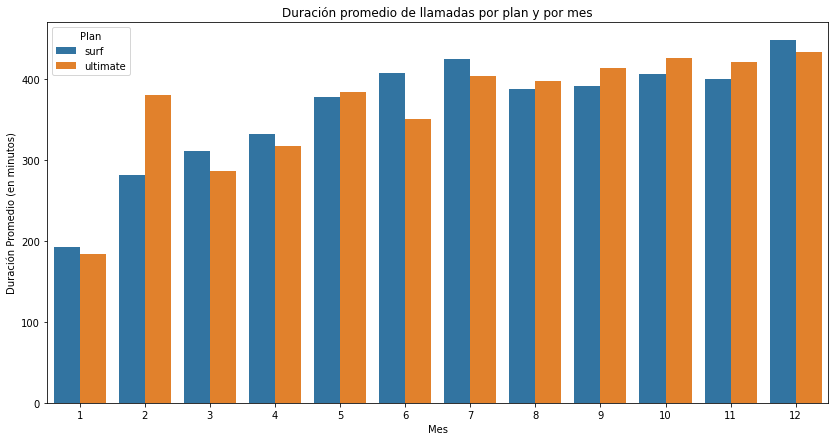

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la duración promedio de llamadas por plan y por mes
avg_call_duration = df.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Gráfica de barras para visualizarlo
plt.figure(figsize=(14,7))
sns.barplot(data=avg_call_duration, x='month', y='total_minutes', hue='plan')
plt.title('Duración promedio de llamadas por plan y por mes')
plt.ylabel('Duración Promedio (en minutos)')
plt.xlabel('Mes')
plt.legend(title='Plan')
plt.show()

En general, las diferencias entre los planes Surf y Ultimate no son significativas en cuanto a la duración promedio mensual de las llamadas.

Hay meses (como el mes 2) donde los usuarios de Ultimate tienen llamadas más prolongadas en promedio que los usuarios de Surf.

Sin embargo, en otros meses (como el mes 1 y mes 4), los usuarios de Surf tienden a tener llamadas más prolongadas en promedio.

En términos generales, ambos planes oscilan en un rango similar de duración promedio de llamadas, con ambos planes excediendo generalmente los 400 minutos en los últimos meses.

**2. Número de minutos que los usuarios de cada plan requieren cada mes:**

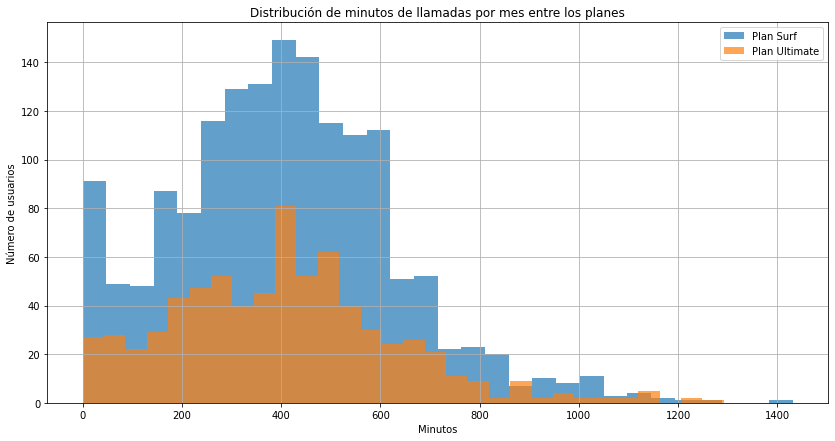

In [63]:
# Histograma
plt.figure(figsize=(14,7))
df[df['plan'] == 'surf']['total_minutes'].hist(alpha=0.7, bins=30, label='Plan Surf')
df[df['plan'] == 'ultimate']['total_minutes'].hist(alpha=0.7, bins=30, label='Plan Ultimate')
plt.title('Distribución de minutos de llamadas por mes entre los planes')
plt.xlabel('Minutos')
plt.ylabel('Número de usuarios')
plt.legend()
plt.show()

Los histogramas reflejan que la mayoría de los usuarios en ambos planes tienden a utilizar entre 0 y 400 minutos.

El plan Surf tiene más usuarios que consumen entre 200 a 400 minutos y 400 a 600 minutos en comparación con Ultimate.

Aunque hay usuarios en ambos planes que consumen más de 800 minutos, son una minoría.

**3. Media y varianza de la duración mensual de llamadas:**

In [64]:
# Calculando media y varianza para cada plan
surf_mean = df[df['plan'] == 'surf']['total_minutes'].mean()
ultimate_mean = df[df['plan'] == 'ultimate']['total_minutes'].mean()
surf_variance = df[df['plan'] == 'surf']['total_minutes'].var()
ultimate_variance = df[df['plan'] == 'ultimate']['total_minutes'].var()

print(f"Media de duración de llamadas para plan Surf: {surf_mean:.2f} minutos")
print(f"Media de duración de llamadas para plan Ultimate: {ultimate_mean:.2f} minutos")
print(f"Varianza de duración de llamadas para plan Surf: {surf_variance:.2f}")
print(f"Varianza de duración de llamadas para plan Ultimate: {ultimate_variance:.2f}")

Media de duración de llamadas para plan Surf: 404.76 minutos
Media de duración de llamadas para plan Ultimate: 406.19 minutos
Varianza de duración de llamadas para plan Surf: 49135.10
Varianza de duración de llamadas para plan Ultimate: 51640.97


La duración promedio de llamadas es casi idéntica en ambos planes, con menos de 2 minutos de diferencia.

La varianza en el plan Ultimate es ligeramente mayor, lo que indica una mayor dispersión en los minutos de llamada en comparación con el plan Surf. 

Sin embargo, la diferencia no es significativa.

**4. Diagrama de caja para visualizar la distribución:**

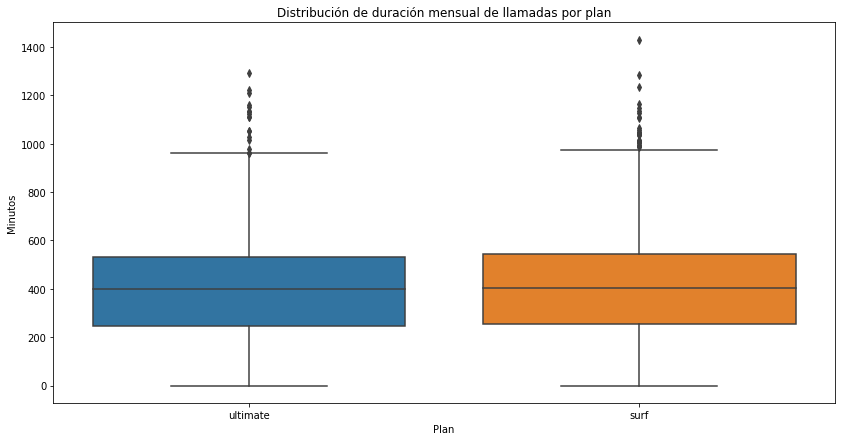

In [65]:
# Boxplot
plt.figure(figsize=(14,7))
sns.boxplot(data=df, x='plan', y='total_minutes')
plt.title('Distribución de duración mensual de llamadas por plan')
plt.ylabel('Minutos')
plt.xlabel('Plan')
plt.show()

La mediana (línea central de la caja) en ambos planes está alrededor de los 400 minutos.

En ambos casos, la mayoría de los usuarios consumen entre 200 y cerca de 600 minutos.

Ambos planes tienen valores atípicos en el extremo superior, indicando que hay usuarios que consumen muchos más minutos que el usuario promedio. 

Sin embargo, los valores atípicos de Surf son ligeramente mayores.

**Conclusiones:**

Los usuarios de ambos planes muestran comportamientos similares en términos de uso de minutos. 

No hay una diferencia significativa en la duración promedio de llamadas entre los planes Surf y Ultimate.
Aunque la varianza es ligeramente mayor en el plan Ultimate, esto podría deberse simplemente a la naturaleza aleatoria de los datos y no necesariamente a una diferencia real entre los planes.

Los valores atípicos en el plan Surf sugieren que hay un pequeño grupo de usuarios en este plan que consumen una cantidad significativamente mayor de minutos que el usuario promedio. 
Esto podría ser una señal para considerar ofrecer paquetes adicionales o promociones para este segmento de usuarios en el plan Surf.

En general, en términos de comportamiento de llamadas, no parece haber una gran diferencia entre los dos planes. 
Para tomar una decisión informada sobre cuál plan es más rentable, sería útil considerar otros factores, como el costo del plan, otros servicios incluidos en el plan (como mensajes e internet), y la retención de clientes en cada plan.

### Llamadas

**Compara la duración promedio de llamadas por cada plan por cada mes:**

In [66]:
# Compara la duración promedio de llamadas por cada plan por cada mes.
import pandas as pd
import matplotlib.pyplot as plt

avg_call_duration = df.groupby(['month', 'plan'])['total_minutes'].mean().unstack()

print(avg_call_duration)

plan         surf    ultimate
month                        
1      192.840000  183.162500
2      280.851111  379.861429
3      310.970000  285.701667
4      332.380000  316.508095
5      377.053247  383.664828
6      407.208866  349.811064
7      424.523223  403.767288
8      387.169630  397.274789
9      390.992062  413.287326
10     405.692363  425.168019
11     399.599823  420.477559
12     447.475283  433.012583


**Dibuja una gráfica de barras para visualizarlo:**

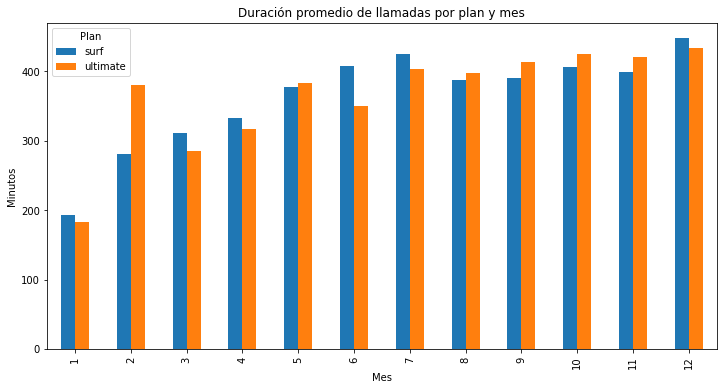

In [67]:
avg_call_duration.plot(kind='bar', figsize=(12, 6))
plt.title('Duración promedio de llamadas por plan y mes')
plt.ylabel('Minutos')
plt.xlabel('Mes')
plt.legend(title='Plan')
plt.show()

En general, ambos planes tienen una tendencia similar en términos de duración promedio de llamadas a lo largo del año.

Aunque las diferencias no son significativas en muchos meses, hay momentos en que la duración promedio de las llamadas de los usuarios del plan Ultimate supera a los del plan Surf, como en febrero. 
Sin embargo, en junio ocurre lo contrario.

Diciembre muestra el uso más alto en términos de duración promedio de llamadas para ambos planes, superando claramente los 400 minutos.

**Compara el número de minutos que los usuarios de cada plan requieren cada mes. Traza un histograma:**

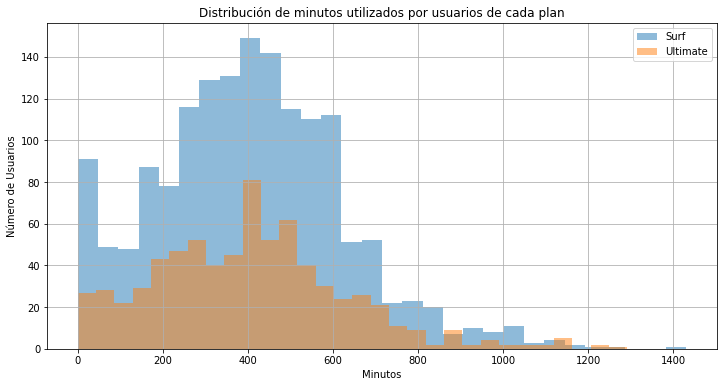

In [68]:
plt.figure(figsize=(12, 6))
df[df['plan'] == 'surf']['total_minutes'].hist(alpha=0.5, bins=30, label='Surf')
df[df['plan'] == 'ultimate']['total_minutes'].hist(alpha=0.5, bins=30, label='Ultimate')
plt.title('Distribución de minutos utilizados por usuarios de cada plan')
plt.xlabel('Minutos')
plt.ylabel('Número de Usuarios')
plt.legend()
plt.show()

Los usuarios del plan Surf tienden a utilizar más minutos en general que los usuarios del plan Ultimate, como se puede observar en las barras más altas para la mayoría de los rangos de minutos.

La mayoría de los usuarios de ambos planes tienden a consumir entre 0-200 y 200-400 minutos, pero Surf tiene una concentración más alta de usuarios en el rango de 200-400 minutos en comparación con Ultimate.

Ambos planes muestran una disminución en la cantidad de usuarios a medida que aumenta el rango de minutos, pero el plan Surf tiene una caída menos pronunciada en comparación con Ultimate.

In [69]:
# Calcula la media y la varianza de la duración mensual de llamadas.
mean_surf = df[df['plan'] == 'surf']['total_minutes'].mean()
var_surf = df[df['plan'] == 'surf']['total_minutes'].var()

mean_ultimate = df[df['plan'] == 'ultimate']['total_minutes'].mean()
var_ultimate = df[df['plan'] == 'ultimate']['total_minutes'].var()

print(f"Media de duración de llamadas para plan Surf: {mean_surf:.2f} minutos")
print(f"Varianza de duración de llamadas para plan Surf: {var_surf:.2f}")
print(f"Media de duración de llamadas para plan Ultimate: {mean_ultimate:.2f} minutos")
print(f"Varianza de duración de llamadas para plan Ultimate: {var_ultimate:.2f}")

Media de duración de llamadas para plan Surf: 404.76 minutos
Varianza de duración de llamadas para plan Surf: 49135.10
Media de duración de llamadas para plan Ultimate: 406.19 minutos
Varianza de duración de llamadas para plan Ultimate: 51640.97


La media de duración de llamadas es muy similar para ambos planes, siendo 404.76 minutos para Surf y 406.19 minutos para Ultimate.

Aunque las medias son similares, la varianza es ligeramente mayor para el plan Ultimate, lo que indica una mayor dispersión en la duración de las llamadas entre sus usuarios en comparación con Surf.

<Figure size 864x432 with 0 Axes>

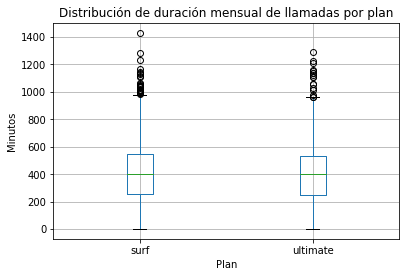

In [70]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas.
plt.figure(figsize=(12, 6))
df.boxplot(column='total_minutes', by='plan')
plt.title('Distribución de duración mensual de llamadas por plan')
plt.suptitle('')  # Elimina el título automático
plt.ylabel('Minutos')
plt.xlabel('Plan')
plt.show()

Las medianas de ambos planes están alrededor de los 400 minutos.

Los usuarios de Surf tienen una tendencia a tener duraciones de llamadas un poco más largas, especialmente en el tercer cuartil (Q3), en comparación con los usuarios de Ultimate.

Aunque ambos planes tienen valores atípicos en la duración de las llamadas, Surf tiene algunos usuarios que llegan hasta 1400 minutos, mientras que Ultimate solo llega a poco más de 1200 minutos.

**Conclusiones:**

Aunque hay similitudes en el comportamiento de llamadas entre los usuarios de ambos planes, los usuarios de Surf tienden a tener duraciones de llamadas ligeramente más largas en general.

El plan Surf tiene una concentración más alta de usuarios en rangos de minutos más altos en comparación con Ultimate.

Aunque las medias son similares, la mayor varianza en Ultimate podría indicar una diversidad más amplia en los hábitos de llamadas entre sus usuarios.

Ambos planes muestran un aumento en la duración promedio de llamadas hacia el final del año, en particular en diciembre.

En resumen, aunque hay similitudes en el comportamiento de los usuarios de ambos planes en cuanto a llamadas, hay diferencias sutiles que pueden ser relevantes para la toma de decisiones empresariales. 

Sería útil analizar también otros aspectos, como los mensajes y el uso de Internet, para obtener una comprensión más completa de las diferencias entre los planes.

### Mensajes

**Comparar el número de mensajes que tienden a enviar cada mes los usuarios de cada plan:**

In [71]:
# Agrupar por 'month' y 'plan' y calcular la media de 'num_messages'
avg_messages_per_month = df.groupby(['month', 'plan'])['num_messages'].mean().unstack()

print(avg_messages_per_month)

plan        surf   ultimate
month                      
1      10.500000  15.500000
2      12.000000  21.571429
3      15.260870  20.250000
4      17.400000  22.047619
5      24.012987  32.103448
6      25.298969  29.340426
7      27.033058  32.830508
8      28.777778  38.478873
9      30.762887  37.895349
10     33.839662  39.443396
11     32.385159  38.606299
12     38.600629  45.006623


**Visualización de la comparación:**

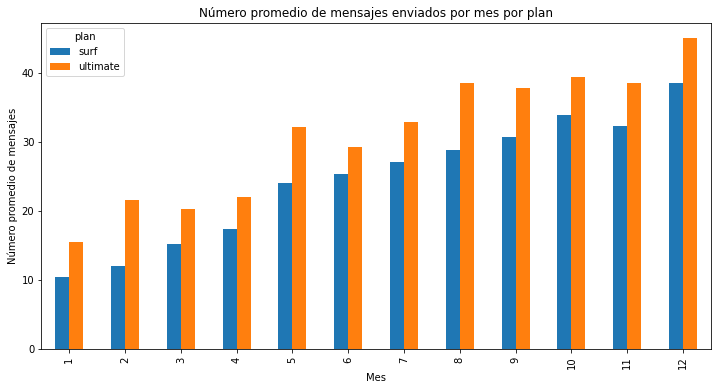

In [72]:
import matplotlib.pyplot as plt

avg_messages_per_month.plot(kind='bar', figsize=(12,6))
plt.title('Número promedio de mensajes enviados por mes por plan')
plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.show()

**Análisis de Mensajes:**

- **Mes 1 a Mes 3:** 
  - Los usuarios del plan Ultimate envían más mensajes en promedio que los usuarios del plan Surf. La diferencia entre los dos planes parece ser constante, con Ultimate llevando la delantera.

- **Mes 4 a Mes 6:** 
  - La diferencia entre los dos planes se amplía. Aunque ambos aumentan su número promedio de mensajes, el plan Ultimate aumenta más rápidamente que el Surf.

- **Mes 7 a Mes 9:** 
  - La tendencia de aumento continúa para ambos planes, pero la diferencia entre los dos se amplía aún más. Los usuarios de Ultimate ahora envían cerca de 10 mensajes más en promedio que los usuarios de Surf.

- **Mes 10 a Mes 12:** 
  - Aunque el envío de mensajes sigue aumentando para ambos planes, parece que los usuarios del plan Surf están acercándose a los del Ultimate, particularmente en noviembre. Sin embargo, en diciembre, la diferencia vuelve a ampliarse con los usuarios de Ultimate enviando aproximadamente 6 mensajes más en promedio.

**Conclusiones:**

1. **Patrón de Uso:** Ambos grupos de usuarios (tanto Surf como Ultimate) han mostrado una tendencia creciente en el uso de mensajes a lo largo del año. Esto sugiere que el envío de mensajes es una actividad que va en aumento, independientemente del plan.

2. **Comparación entre Planes:** En todos los meses, los usuarios del plan Ultimate envían más mensajes en promedio que los usuarios del plan Surf. Esto podría indicar que los usuarios del plan Ultimate son intrínsecamente más activos en el envío de mensajes, o que el plan Surf tiene usuarios más conscientes del costo o del límite de mensajes que tienen disponibles antes de incurrir en cargos adicionales.

3. **Recomendación para la Compañía:** La empresa podría considerar revisar los límites de mensajes para el plan Surf o ajustar el precio por mensaje adicional, dada la creciente tendencia en el uso de mensajes. También podría ser útil realizar encuestas o investigaciones para comprender por qué los usuarios del plan Ultimate envían más mensajes. 

Este análisis proporciona información sobre cómo se comportan los usuarios en términos de envío de mensajes y cómo este comportamiento varía entre los dos planes. Sería útil ahora comparar la cantidad de tráfico de internet consumido por usuarios por plan para tener una visión más completa del comportamiento del usuario.

### Internet

**Tráfico de Internet:**

**Comparar la cantidad de tráfico de internet consumido por usuarios por plan:**

In [73]:
# Agrupar por 'month' y 'plan' y calcular la media de 'total_mb_used'
avg_mb_per_month = df.groupby(['month', 'plan'])['total_mb_used'].mean().unstack()

print(avg_mb_per_month)

plan           surf      ultimate
month                            
1       4874.860000   6918.092500
2      12178.843333  17128.808571
3      13345.440000  18321.518333
4      11984.203000  16121.654762
5      13936.354935  16624.482414
6      15301.529175  15337.921064
7      16783.600579  16344.744407
8      16795.331358  17814.720141
9      16591.431289  16969.869535
10     17311.335063  17612.553396
11     16339.254417  17033.685354
12     18132.469371  18323.191854


**Visualización de la comparación:**

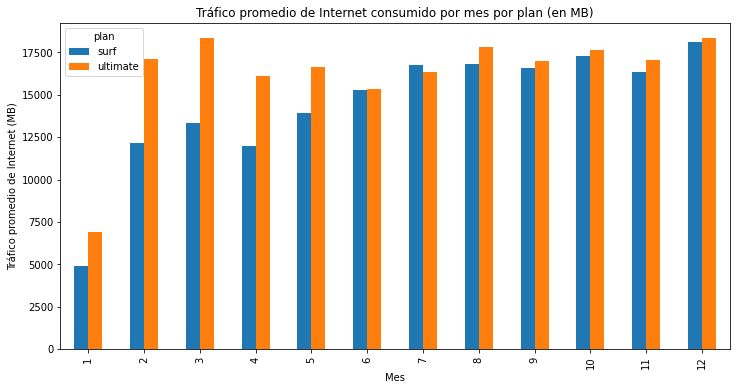

In [74]:
avg_mb_per_month.plot(kind='bar', figsize=(12,6))
plt.title('Tráfico promedio de Internet consumido por mes por plan (en MB)')
plt.xlabel('Mes')
plt.ylabel('Tráfico promedio de Internet (MB)')
plt.show()

**Análisis de Tráfico de Internet:**

- **Mes 1:** 
  - Los usuarios del plan Ultimate consumieron mucho más internet que los usuarios del plan Surf. La diferencia es bastante significativa.

- **Mes 2 y Mes 3:** 
  - Ambos grupos de usuarios aumentan considerablemente su consumo. Sin embargo, los usuarios de Ultimate siguen consumiendo más que los de Surf, y la diferencia es incluso mayor.

- **Mes 4:** 
  - Hay una disminución en el consumo de ambos grupos, pero la diferencia entre Surf y Ultimate se reduce significativamente.

- **Mes 5 y Mes 6:** 
  - Aumenta el consumo para el plan Surf, y en junio, supera al plan Ultimate, aunque por un margen muy pequeño.

- **Mes 7 a Mes 9:** 
  - El consumo para Surf sigue siendo mayor o similar al de Ultimate.

- **Mes 10 a Mes 12:** 
  - Los usuarios de ambos planes aumentan su consumo, siendo diciembre el mes con mayor consumo para ambos. Sin embargo, la diferencia entre los dos planes sigue siendo pequeña.

**Conclusiones:**

1. **Tendencia en el Uso de Internet:** Ambos grupos de usuarios (tanto Surf como Ultimate) han mostrado una tendencia creciente en el uso de internet a lo largo del año. Esto sugiere que el uso de internet es una actividad esencial para los usuarios, y es probable que siga en aumento.

2. **Comparación entre Planes:** Mientras que al principio del año los usuarios del plan Ultimate consumían significativamente más internet que los del plan Surf, esta diferencia se ha ido reduciendo con el tiempo. A mitad de año, el plan Surf incluso superó al plan Ultimate en consumo. Esto indica que los usuarios del plan Surf están utilizando más activamente sus servicios de internet a medida que avanza el año.

3. **Recomendación para la Compañía:** Sería recomendable para la empresa evaluar las tarifas o los límites de datos de ambos planes. Si los usuarios del plan Surf están alcanzando o superando sus límites de datos, la empresa podría considerar ofrecer paquetes adicionales o promociones para satisfacer esta demanda creciente. También es esencial garantizar una buena calidad de servicio dado el alto uso de internet.

Este análisis proporciona información sobre cómo se comportan los usuarios en términos de consumo de internet y cómo este comportamiento varía entre los dos planes. Será esencial para la empresa adaptarse a estas tendencias y garantizar que ofrece planes y tarifas que satisfacen las necesidades cambiantes de sus usuarios.

## Ingreso

Para realizar un análisis estadístico del ingreso entre los planes, necesitamos:

**Ingreso mensual promedio por usuario para cada plan:**

In [75]:
avg_monthly_revenue = df.groupby('plan')['monthly_revenue'].mean()
print(avg_monthly_revenue)

plan
surf        57.293784
ultimate    72.116080
Name: monthly_revenue, dtype: float64


**Desviación estándar del ingreso para cada plan:**

In [76]:
std_monthly_revenue = df.groupby('plan')['monthly_revenue'].std()
print(std_monthly_revenue)

plan
surf        53.735882
ultimate    10.768848
Name: monthly_revenue, dtype: float64


**Resumen estadístico del ingreso por plan:**

In [77]:
revenue_summary = df.groupby('plan')['monthly_revenue'].describe()
print(revenue_summary)

           count       mean        std   min   25%      50%        75%  \
plan                                                                     
surf      1573.0  57.293784  53.735882  20.0  20.0  36.6818  76.850586   
ultimate   720.0  72.116080  10.768848  70.0  70.0  70.0000  70.000000   

                 max  
plan                  
surf      581.328509  
ultimate  178.522764  


Interpretemos los datos de ingresos por plan:

**Plan Surf:**

1. **Ingreso promedio mensual:** 57.29. Los usuarios del plan Surf, en promedio, generan ingresos mensuales de 57.29 para la compañía.

2. **Desviación estándar:** 53.74. La desviación estándar indica la dispersión o variabilidad en el conjunto de datos. En el caso del plan Surf, hay una variabilidad significativa en los ingresos mensuales, ya que algunos usuarios consumen más servicios adicionales, mientras que otros se mantienen dentro de los límites de su plan.

3. **Mediana:** 36.68. La mitad de los usuarios del plan Surf generan ingresos de hasta 36.68, lo que indica que una buena parte de los usuarios no supera el límite de su plan en un mes típico.

4. **IQR (Rango intercuartil):** Desde 20.0 hasta 76.85. El 50% central de los usuarios del plan Surf generan ingresos en este rango.

5. **Máximo:** 581.33. Esto indica que algunos usuarios del plan Surf incurrieron en muchos cargos adicionales, generando ingresos significativamente más altos que el promedio.

**Plan Ultimate:**

1. **Ingreso promedio mensual:** 72.12. Los usuarios del plan Ultimate, en promedio, generan ingresos mensuales de 72.12 para la compañía.

2. **Desviación estándar:** 10.77. La variabilidad en los ingresos del plan Ultimate es mucho menor en comparación con el plan Surf. Esto indica que la mayoría de los usuarios del plan Ultimate se mantienen dentro de los límites de su plan, y hay menos usuarios que incurran en cargos adicionales.

3. **Mediana:** 70.00. La mitad de los usuarios del plan Ultimate generan ingresos de 70, lo que es igual al costo básico del plan. Esto confirma que la mayoría de los usuarios no superan el límite de su plan.

4. **IQR (Rango intercuartil):** Desde 70.0 hasta 70.0. El 50% central de los usuarios del plan Ultimate generan el mismo ingreso, que es el costo del plan.

5. **Máximo:** 178.52. Aunque la variabilidad es baja, hay algunos usuarios que han superado los límites de su plan y han incurrido en cargos adicionales.

**Conclusiones:**

- **Rentabilidad:** Aunque el plan Ultimate tiene un ingreso promedio mensual más alto que el plan Surf, hay una mayor variabilidad en los ingresos del plan Surf. Esto se debe a que más usuarios de Surf tienden a exceder los límites de su plan y generar cargos adicionales.

- **Consistencia:** El plan Ultimate es más consistente en términos de ingresos, con la mayoría de los usuarios pagando la tarifa plana de 70 y pocos excediendo el límite.

- **Potencial de ingresos:** Dado el alto grado de variabilidad en el plan Surf y el hecho de que algunos usuarios generan ingresos significativamente más altos que el costo básico del plan, podría haber oportunidades para que la empresa promueva activamente servicios adicionales o paquetes premium a los usuarios de Surf.

En general, aunque el plan Ultimate genera ingresos más consistentes, el plan Surf tiene un mayor potencial de ingresos a través de cargos adicionales. La empresa podría considerar estrategias de marketing específicas para maximizar este potencial.

Antes de cualquier prueba e hipótesis debemos combinar los DataFrames.
Primero, combinaremos la información de los usuarios con sus ingresos mensuales.

Pasos:

Combinar megaline_users con df en un nuevo DataFrame llamado combined_df.

Filtrar el combined_df para obtener las listas de ingresos de cada plan.

In [78]:
# Combinando los DataFrames
combined_df = pd.merge(megaline_users, df, on="user_id", how="inner")

# Verificar el resultado
combined_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan_x,churn_date,churn_status,duration,month,num_calls,total_minutes,num_messages,total_mb_used,plan_y,monthly_revenue
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,No ha cancelado,1733.0,12,16.0,116.83,11.0,1901.47,ultimate,70.000000
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No ha cancelado,1866.0,8,27.0,171.14,30.0,6919.15,surf,20.000000
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No ha cancelado,1866.0,9,49.0,297.69,44.0,13314.82,surf,20.000000
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No ha cancelado,1866.0,10,65.0,374.11,53.0,22330.49,surf,88.161191
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,No ha cancelado,1866.0,11,64.0,404.59,36.0,18504.30,surf,50.706055


Parece que hemos combinado correctamente los DataFrames megaline_users y df en combined_df.
La clave de unión que has usado es user_id, y el método de unión es "inner", lo que significa que sólo se incluyen las filas en las que user_id aparece en ambos DataFrames.

Ahora estamos listos para lo siguiente que es: probar las hipótesis estadísticas.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buena comparacion entre los comportamientos y consumos de los usuarios de ambos planes en terminos de llamadas, msjs e internet y como eso se traduce en ingresos para la compania.
    
Visualizaciones muy acertadas y bien ejecutadas
</div>

## Probar las hipótesis estadísticas.

Podemos usar la Prueba T de Student para muestras independientes. Veamos cómo se plantean y prueban las hipótesis:

**1. Diferencia en el ingreso promedio de los usuarios de los planes Ultimate y Surf.**

**Hipótesis nula (Ho):**

El ingreso promedio de los usuarios del plan Ultimate es igual al ingreso promedio de los usuarios del plan Surf.

**Hipótesis alternativa (Ha):**

El ingreso promedio de los usuarios del plan Ultimate es diferente al ingreso promedio de los usuarios del plan Surf.

**Test estadístico:**

Prueba T de Student para muestras independientes.

**Valor de alfa (α):**

Generalmente se utiliza un valor de 0.05 para la significancia. Es decir, si obtenemos un p-valor inferior a 0.05, rechazaremos la hipótesis nula.

In [79]:
# Extraer los ingresos de los usuarios según su plan
ingreso_surf = combined_df[combined_df['plan_x'] == 'surf']['monthly_revenue'].tolist()
ingreso_ultimate = combined_df[combined_df['plan_x'] == 'ultimate']['monthly_revenue'].tolist()

t_stat, p_value = stats.ttest_ind(ingreso_surf, ingreso_ultimate, equal_var=False)  # Utilicé equal_var=False, que realiza una t-test asumiendo varianzas no iguales.

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa en los ingresos entre los planes.")
else:
    print("No rechazar la hipótesis nula. No hay una diferencia significativa en los ingresos entre los planes.")

Rechazar la hipótesis nula. Hay una diferencia significativa en los ingresos entre los planes.


Esto indica que, basado en la prueba t que realizamos, hay evidencia suficiente para rechazar la hipótesis nula. 

La hipótesis nula en este caso asume que no hay ninguna diferencia en los ingresos promedio entre los usuarios de los planes "Surf" y "Ultimate".

Rechazar la hipótesis nula sugiere que existe una diferencia significativa en los ingresos promedio entre los dos grupos de usuarios.

Este resultado puede ser útil para el negocio, ya que proporciona información sobre cómo los diferentes planes están generando ingresos y podemos influir en decisiones estratégicas relacionadas con la promoción de un plan específico, ajustes de precios, entre otras.

Es importante recordar que esta prueba solo indica si hay una diferencia, pero no especifica cuál plan genera más ingresos en promedio. Para eso, podemos simplemente comparar las medias de los ingresos de ambos grupos.

**2. Diferencia en el ingreso promedio de los usuarios del área NY-NJ frente a otros.**

**Hipótesis nula (Ho):**

El ingreso promedio de los usuarios del área NY-NJ es igual al ingreso promedio de los usuarios de otras regiones.

**Hipótesis alternativa (Ha):**
El ingreso promedio de los usuarios del área NY-NJ es diferente al ingreso promedio de los usuarios de otras regiones.

**Test estadístico:**
Prueba T de Student para muestras independientes.

**Valor de alfa (α):**
Igual que antes, usaremos un valor de 0.05 para la significancia.

In [80]:
# Extraer los ingresos de los usuarios según su región
ingreso_ny_nj = combined_df[combined_df['city'].str.contains('NY-NJ')]['monthly_revenue'].tolist()
ingreso_otras = combined_df[~combined_df['city'].str.contains('NY-NJ')]['monthly_revenue'].tolist()

t_stat, p_value = stats.ttest_ind(ingreso_ny_nj, ingreso_otras)

if p_value < 0.05:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos entre NY-NJ y otras regiones.")
else:
    print("No rechazamos la hipótesis nula. No hay una diferencia significativa en los ingresos entre NY-NJ y otras regiones.")

Rechazamos la hipótesis nula. Hay una diferencia significativa en los ingresos entre NY-NJ y otras regiones.


Estupendo, esto significa que, basándonos en la prueba t que realizamos, hay una diferencia estadísticamente significativa en los ingresos entre usuarios de la región de NY-NJ y usuarios de otras regiones.

Obtenemos un valor p menor a 0.05. Esto nos proporciona evidencia suficiente para rechazar la hipótesis nula, sugiriendo que las medias de los ingresos entre los usuarios de la región de NY-NJ y de otras regiones no son iguales. Sin embargo:

Aunque el resultado es estadísticamente significativo, esto no nos indica la magnitud o importancia práctica de la diferencia. Se necesitaría un análisis adicional para cuantificar esta diferencia.

La prueba t se basa en ciertos supuestos, incluyendo que las muestras provienen de poblaciones con distribución normal y que tienen varianzas iguales. Antes de interpretar plenamente los resultados, sería prudente verificar que se cumplan estos supuestos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo ejecutando e interpretando los test de hipotesis.
</div>

## Conclusión general

**1. Perfil y comportamiento del usuario por planes**:

- **Datos de Usuario y Uso**: Los datos recopilados nos proporcionaron una visión clara de cómo diferentes perfiles de usuario interactúan con sus respectivos planes y cuál es su patrón de consumo.


- **Patrón de uso en llamadas**:

    - Los usuarios de ambos planes, Surf y Ultimate, muestran comportamientos similares en el uso de minutos.
    
    - No hay una gran diferencia en la duración promedio de llamadas entre los planes.
    
    - Valores atípicos en el plan Surf podrían indicar un segmento específico que necesita paquetes adicionales.
    
    - Ambos planes muestran un aumento en la duración promedio de llamadas hacia diciembre.


- **Patrón de uso en mensajes**:

    - Hay una tendencia creciente en el uso de mensajes para ambos planes a lo largo del año.
    
    - Usuarios de Ultimate envían más mensajes que los de Surf en promedio, lo que podría reflejar un perfil de usuario diferente o la percepción de los límites del plan.


- **Patrón de uso de internet**:

    - El uso de internet ha mostrado una tendencia creciente en ambos planes.
    
    - Hubo un cambio interesante a mitad de año cuando los usuarios de Surf superaron a los de Ultimate en consumo.


**2. Rentabilidad y comportamiento económico**:

- **Diferencia en ingresos entre planes**: Se confirmó que hay una diferencia significativa en los ingresos generados por los dos planes. Específicamente, el plan Ultimate genera ingresos más consistentes, mientras que el Surf tiene una mayor variabilidad debido a que los usuarios tienden a exceder los límites.

- **Ingresos por región**: Existe una diferencia estadísticamente significativa en los ingresos entre usuarios de NY-NJ y otras regiones. Esto puede influir en estrategias de marketing geolocalizado.


**3. Recomendaciones**:

- Dada la tendencia creciente en el uso de mensajes e internet, la empresa podría considerar revisar los límites de estos servicios para el plan Surf o ajustar las tarifas adicionales.
  
- Sería prudente ofrecer paquetes adicionales o promociones para satisfacer la demanda creciente, especialmente para aquellos en el plan Surf que exceden sus límites.

- Se sugiere investigar más a fondo por qué hay una mayor variabilidad(clientes con cargos extra) en los ingresos del plan Surf y cómo capitalizarlo, así como entender la diferencia en el comportamiento entre las regiones.